# Aligning ORB with first 15min candle data 
#### Reason for aligning with first 15min candle gives us the idea of stretch mentioned by Tony Crabel's book

In [2]:
import pandas as pd
df = pd.read_excel("Nifty50_with_1st_15min.xlsx", parse_dates=["Date"], index_col="Date")

In [3]:
df.shape

(2349, 12)

In [4]:
df.columns

Index(['Open_30', 'Close_30', 'Low_30', 'High_30', 'Open', 'High', 'Low',
       'Close', 'OPR', 'CPR', 'Solid', 'True_Range_ratio'],
      dtype='object')

In [7]:
df['True_Range_ratio_30'] = ((df['High_30'] - df['Low_30'])/df['Prev_Close'])*100
df["OPR_30"] = (df['Open_30'] - df['Low_30'])/(df['High_30'] - df['Low_30'])
df["CPR_30"] = (df['Close_30'] - df['Low_30'])/(df['High_30'] - df['Low_30'])
df["Solid_30"] = (abs(df['Open_30'] - df['Close_30']))/(df['High_30'] - df['Low_30'])

KeyError: 'Prev_Close'

In [6]:
df.shape

(2349, 12)

In [17]:
df.head()

,Open_30,Close_30,Low_30,High_30,Open,High,Low,Close,OPR,CPR,...,CPR_Prev,OPR_Prev,Prev_Close,Open-Low%,Open-High%,Range~Prev_Close,True_Range_ratio_30,OPR_30,CPR_30,Solid_30
Date,,,,,,,,,,,,,,,,,,,,,
2010-01-04,5201.00,5220.00,5167.0,5224.00,5200.90,5238.45,5167.10,5232.2,0.473721,0.912404,...,0.772579,0.756257,5277.9,0.640406,0.711457,1.351863,1.079975,0.596491,0.929825,0.333333
2010-01-05,5277.00,5278.00,5242.0,5286.00,5277.15,5288.35,5242.40,5277.9,0.756257,0.772579,...,0.428150,0.356299,5281.8,0.657920,0.212049,0.869969,0.833049,0.795455,0.818182,0.022727
2010-01-06,5278.00,5287.00,5271.0,5311.00,5278.15,5310.85,5260.05,5281.8,0.356299,0.428150,...,0.317474,0.641003,5263.1,0.343904,0.621307,0.965211,0.760008,0.175000,0.400000,0.225000
2010-01-07,5281.80,5270.15,5264.5,5302.55,5281.80,5302.55,5244.75,5263.1,0.641003,0.317474,...,0.237812,0.702735,5244.7,0.706427,0.395638,1.102065,0.725494,0.454665,0.148489,0.306176
2010-01-08,5264.25,5259.65,5251.3,5275.10,5264.25,5276.75,5234.70,5244.7,0.702735,0.237812,...,0.363636,0.606061,5249.4,0.562921,0.238122,0.801044,0.453385,0.544118,0.350840,0.193277


In [32]:
df['Range~Prev_Close'].describe()

count    2348.000000
mean        1.266065
std         0.909413
min         0.246119
25%         0.756556
50%         1.057894
75%         1.503250
max        17.442429
Name: Range~Prev_Close, dtype: float64

In [21]:
df['True_Range_ratio_30'].describe()

count    2348.000000
mean        0.614624
std         0.523884
min         0.140583
25%         0.373667
50%         0.506421
75%         0.721057
max        16.334567
Name: True_Range_ratio_30, dtype: float64

In [20]:
df['True_Range_ratio_30'][(df['OPR'] > 0.8) | (df['OPR'] < 0.2)].describe()

count    1269.000000
mean        0.662707
std         0.603270
min         0.140583
25%         0.388613
50%         0.548415
75%         0.776149
max        16.334567
Name: True_Range_ratio_30, dtype: float64

In [22]:
df['True_Range_ratio_30'][(df['OPR'] > 0.8)].describe()

count    736.000000
mean       0.682374
std        0.713735
min        0.140583
25%        0.395598
50%        0.551982
75%        0.786791
max       16.334567
Name: True_Range_ratio_30, dtype: float64

In [23]:
df['True_Range_ratio_30'][(df['OPR'] < 0.2)].describe()

count    533.000000
mean       0.635549
std        0.402923
min        0.174955
25%        0.377513
50%        0.539671
75%        0.768433
max        4.092333
Name: True_Range_ratio_30, dtype: float64

#### The above analysis suggests that there is no apparent difference in range of first 15 candle

#### Another point to note here is, that true range of first 15min candle is more than 04% for 70% of the times, which clearly suggests that average volatility around the open is very high

In [24]:
df['OPR_30'].describe()

count    2349.000000
mean        0.554332
std         0.351242
min         0.000000
25%         0.205689
50%         0.582923
75%         0.908046
max         1.000000
Name: OPR_30, dtype: float64

In [27]:
df['CPR_30'][df['OPR'] < 0.2].describe()

count    533.000000
mean       0.741724
std        0.218875
min        0.020202
25%        0.610975
50%        0.803789
75%        0.914740
max        1.000000
Name: CPR_30, dtype: float64

(array([  6.,   6.,  17.,  20.,  33.,  47.,  50.,  81., 116., 157.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

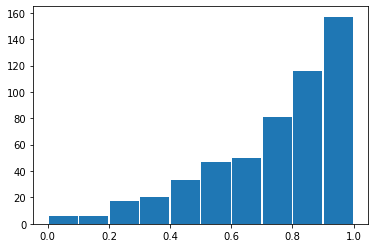

In [30]:
import matplotlib.pyplot as plt
%matplotlib inline
bin_range = (0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1)

plt.hist(df['CPR_30'][df['OPR'] < 0.2],rwidth=0.95,bins=bin_range)

In [28]:
df['CPR_30'][df['OPR'] > 0.8].describe()

count    737.000000
mean       0.304584
std        0.214313
min        0.000000
25%        0.141066
50%        0.259036
75%        0.428051
max        0.995316
Name: CPR_30, dtype: float64

(array([116., 164., 150.,  99.,  75.,  51.,  34.,  24.,  17.,   7.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

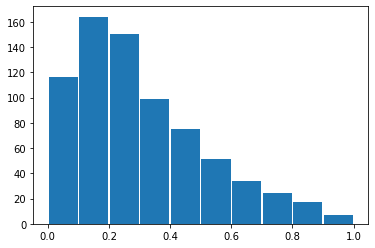

In [31]:
plt.hist(df['CPR_30'][df['OPR'] > 0.8],rwidth=0.95,bins=bin_range)

#### The above statistics suggests that ORB direction can generally be assessed with the help of first 15min candle

## Statistics around 15min candle

In [41]:
df['Upper'] = ((df['High'] - df['High_30'])/df['Prev_Close'])*100
df['Lower'] = ((df['Low_30'] - df['Low'])/df['Prev_Close'])*100

In [42]:
df['Upper'].describe()

count    2348.000000
mean        0.283844
std         0.505946
min        -0.125377
25%         0.000000
50%         0.095819
75%         0.389603
max        11.157501
Name: Upper, dtype: float64

In [43]:
df['Lower'].describe()

count    2348.000000
mean        0.367596
std         0.522980
min        -0.007573
25%         0.000000
50%         0.179368
75%         0.531931
max         5.390638
Name: Lower, dtype: float64

In [44]:
df['Upper'][df['OPR'] < 0.2].describe()

count    533.000000
mean       0.652487
std        0.630501
min        0.000000
25%        0.232929
50%        0.504134
75%        0.905596
max        5.804709
Name: Upper, dtype: float64

In [45]:
df['Lower'][df['OPR'] > 0.8].describe()

count    736.000000
mean       0.705345
std        0.665300
min        0.000000
25%        0.253472
50%        0.539074
75%        0.934544
max        5.390638
Name: Lower, dtype: float64

#### This suggests that less than 50% of the times that to in ORB trades, the index makes an 0.6% move from the high of 15min candle.
#### More than 75% of the times its less than 1%, that too in direction of ORB

In [47]:
df['Lower'][(df['OPR'] > 0.2) & (df['OPR'] < 0.8)].describe()

count    1079.000000
mean        0.310583
std         0.388043
min        -0.007573
25%         0.008283
50%         0.192160
75%         0.444828
max         3.957185
Name: Lower, dtype: float64

In [48]:
df['Upper'][(df['OPR'] > 0.2) & (df['OPR'] < 0.8)].describe()

count    1079.000000
mean        0.282233
std         0.493538
min        -0.125377
25%         0.000000
50%         0.165714
75%         0.398290
max        11.157501
Name: Upper, dtype: float64

#### For trades other than ORB, the index doesn't move more than 0.5% for more than 75% of the time

## After directional first 15min candle at open

In [62]:
df['CPR'][df['CPR_30'] > 0.7].describe()

count    760.000000
mean       0.610879
std        0.287986
min        0.038998
25%        0.341720
50%        0.706382
75%        0.866555
max        0.966050
Name: CPR, dtype: float64

In [63]:
df['CPR'][df['CPR_30'] < 0.3].describe()

count    730.000000
mean       0.416913
std        0.285572
min        0.033240
25%        0.155098
50%        0.351103
75%        0.672977
max        0.967550
Name: CPR, dtype: float64

In [73]:
df['Upper'][df['CPR_30'] > 0.8].describe()

count    536.000000
mean       0.433612
std        0.443527
min       -0.000432
25%        0.112550
50%        0.292917
75%        0.637086
max        2.548925
Name: Upper, dtype: float64

In [70]:
df['Upper'][(df['CPR_30'] > 0.8) & (df['OPR_30'] < 0.2)].describe()

count    258.000000
mean       0.442270
std        0.451234
min        0.000000
25%        0.121048
50%        0.287688
75%        0.653464
max        2.548925
Name: Upper, dtype: float64

In [66]:
df['Lower'][(df['CPR_30'] < 0.2)].describe()

count    462.000000
mean       0.585437
std        0.655452
min       -0.000482
25%        0.157733
50%        0.393979
75%        0.761949
max        5.390638
Name: Lower, dtype: float64

In [67]:
df['Lower'][(df['CPR_30'] < 0.2) & (df['OPR_30'] > 0.8)].describe()

count    285.000000
mean       0.637909
std        0.706796
min       -0.000482
25%        0.167769
50%        0.422554
75%        0.816377
max        5.390638
Name: Lower, dtype: float64

In [74]:
df['OPR'][(df['CPR_30'] < 0.2)].describe()

count    462.000000
mean       0.780753
std        0.239618
min        0.002973
25%        0.613529
50%        0.882861
75%        0.979659
max        1.000000
Name: OPR, dtype: float64

In [75]:
df['OPR'][(df['CPR_30'] > 0.8)].describe()

count    536.000000
mean       0.276287
std        0.264054
min        0.000000
25%        0.044541
50%        0.180142
75%        0.479049
max        0.992500
Name: OPR, dtype: float64

#### Above OPR distribution suggests that the tendency for open being the extreme of the Day tends rise after strong directional first 15min candle

In [76]:
df['CPR'][(df['CPR_30'] > 0.8)].describe()

count    536.000000
mean       0.621782
std        0.282858
min        0.038998
25%        0.380231
50%        0.723800
75%        0.873505
max        0.966050
Name: CPR, dtype: float64

In [77]:
df['CPR'][(df['CPR_30'] < 0.2)].describe()

count    462.000000
mean       0.401375
std        0.287129
min        0.033240
25%        0.141052
50%        0.322945
75%        0.659472
max        0.967550
Name: CPR, dtype: float64

#### After strong directional move at open (1st 15min candle), the close tends to occur in the half of the 15min candles direction

## Day's range when compared to first candle

In [78]:
df["True_Range_ratio"][df['True_Range_ratio_30'] > 0.7].describe() 

count    627.000000
mean       1.932918
std        1.315705
min        0.723776
25%        1.239668
50%        1.648186
75%        2.172509
max       16.133046
Name: True_Range_ratio, dtype: float64

In [79]:
df["True_Range_ratio"][df['True_Range_ratio_30'] < 0.4].describe() 

count    727.000000
mean       0.864751
std        0.416083
min        0.246096
25%        0.577846
50%        0.754834
75%        1.046948
max        3.192689
Name: True_Range_ratio, dtype: float64

In [80]:
df["True_Range_ratio"][(df['True_Range_ratio_30'] > 0.4) & (df['True_Range_ratio_30'] < 0.7) ].describe() 

count    994.000000
mean       1.138873
std        0.525410
min        0.421364
25%        0.780590
50%        1.025891
75%        1.318276
max        6.128260
Name: True_Range_ratio, dtype: float64

#### The above analysis suggests that there is strong correlation between 15min candle range and daily range

## Trading Strategy after directional 15min candle

### 1) Relation of first candle with day's OPR

In [86]:
df['OPR'][((df['OPR_30'] < 0.7) & (df['CPR_30'] > 0.7)) | ((df['OPR_30'] < 0.2) & (df['CPR_30'] > 0.6))].describe()

count    717.000000
mean       0.259874
std        0.250973
min        0.000000
25%        0.044133
50%        0.168693
75%        0.458451
max        0.985894
Name: OPR, dtype: float64

(array([280., 102.,  64.,  69.,  45.,  63.,  43.,  30.,  17.,   4.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

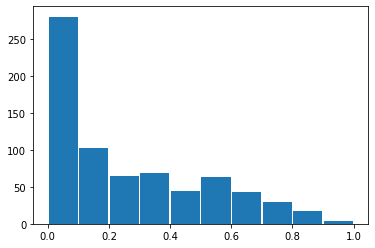

In [88]:
plt.hist(df['OPR'][((df['OPR_30'] < 0.7) & (df['CPR_30'] > 0.7)) | ((df['OPR_30'] < 0.2) & (df['CPR_30'] > 0.6))],rwidth=0.95,bins=bin_range)

In [87]:
df['OPR'][((df['OPR_30'] > 0.3) & (df['CPR_30'] < 0.3)) | ((df['OPR_30'] > 0.8) & (df['CPR_30'] < 0.4))].describe()

count    783.000000
mean       0.797726
std        0.223572
min        0.080764
25%        0.643606
50%        0.895408
75%        0.977355
max        1.000000
Name: OPR, dtype: float64

(array([  1.,  11.,  15.,  34.,  44.,  56.,  62.,  53., 122., 385.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

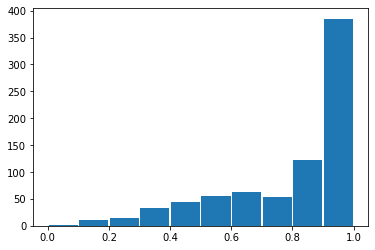

In [89]:
plt.hist(df['OPR'][((df['OPR_30'] > 0.3) & (df['CPR_30'] < 0.3)) | ((df['OPR_30'] > 0.8) & (df['CPR_30'] < 0.4))],rwidth=0.95,bins=bin_range)

## Very strong evidence that first 15min candle decides the fate of where day's OPR may lie

### 2) Opposite side range for setting stop-loss

In [90]:
df['Upper'][((df['OPR_30'] > 0.3) & (df['CPR_30'] < 0.3)) | ((df['OPR_30'] > 0.8) & (df['CPR_30'] < 0.4))].describe()

count    783.000000
mean       0.163539
std        0.530118
min       -0.000497
25%        0.000000
50%        0.000000
75%        0.137870
max       11.157501
Name: Upper, dtype: float64

In [91]:
df['Lower'][((df['OPR_30'] < 0.7) & (df['CPR_30'] > 0.7)) | ((df['OPR_30'] < 0.2) & (df['CPR_30'] > 0.6))].describe()

count    717.000000
mean       0.218516
std        0.439059
min       -0.001895
25%        0.000000
50%        0.000000
75%        0.251549
max        3.621319
Name: Lower, dtype: float64

#### So less than 75% of the trades go beyond 0.25% of first candles opposite extreme

In [136]:
df['Upper'][(((df['OPR_30'] > 0.3) & (df['CPR_30'] < 0.3)) | ((df['OPR_30'] > 0.8) & (df['CPR_30'] < 0.4))) & (df['Upper'] <= 0.1) ].describe()

count    567.000000
mean       0.004457
std        0.015313
min       -0.000497
25%        0.000000
50%        0.000000
75%        0.000000
max        0.097069
Name: Upper, dtype: float64

In [137]:
df['Lower'][(((df['OPR_30'] < 0.7) & (df['CPR_30'] > 0.7)) | ((df['OPR_30'] < 0.2) & (df['CPR_30'] > 0.6))) & (df['Lower'] <= 0.1)].describe()

count    477.000000
mean       0.007543
std        0.020867
min       -0.001895
25%        0.000000
50%        0.000000
75%        0.000000
max        0.098733
Name: Lower, dtype: float64

### We can use the above condition to calculate the profits that we could have accured

In [141]:
df["Close~15min-High"] = ((df['Close'] - df['High_30'])/df['Prev_Close'])*100
df["Close~15min-Low"] = ((df['Low_30'] - df['Close'])/df['Prev_Close'])*100

#### Above variables are only generated to assess the directional validity, we can't use in all data interpretation

In [154]:
df["Close~15min-High"][(((df['OPR_30'] < 0.7) & (df['CPR_30'] > 0.7)) | ((df['OPR_30'] < 0.2) & (df['CPR_30'] > 0.6)))].describe()

count    717.000000
mean      -0.078934
std        0.779251
min       -4.831004
25%       -0.437768
50%       -0.018376
75%        0.385126
max        2.551779
Name: Close~15min-High, dtype: float64

In [1]:
df["Close~15min-High"][(((df['OPR_30'] < 0.7) & (df['CPR_30'] > 0.7)) | ((df['OPR_30'] < 0.2) & (df['CPR_30'] > 0.6))) & ( df["Close~15min-High"] < -0.25 ) ].describe()

NameError: name 'df' is not defined

In [156]:
df["Close~15min-Low"][(((df['OPR_30'] > 0.3) & (df['CPR_30'] < 0.3)) | ((df['OPR_30'] > 0.8) & (df['CPR_30'] < 0.4)))   ].describe()

count    783.000000
mean      -0.019150
std        0.959860
min      -14.473112
25%       -0.432492
50%       -0.018086
75%        0.398888
max        4.643367
Name: Close~15min-Low, dtype: float64

In [176]:
df["Close~15min-Low"][(((df['OPR_30'] > 0.3) & (df['CPR_30'] < 0.3)) | ((df['OPR_30'] > 0.8) & (df['CPR_30'] < 0.4))) & (df['Upper'] <= 0.1)  ].describe()

count    567.000000
mean       0.270347
std        0.680328
min       -2.578807
25%       -0.143522
50%        0.146800
75%        0.564602
max        4.643367
Name: Close~15min-Low, dtype: float64

In [178]:
df["Close~15min-High"][(((df['OPR_30'] < 0.7) & (df['CPR_30'] > 0.7)) | ((df['OPR_30'] < 0.2) & (df['CPR_30'] > 0.6))) & (df['Lower'] <= 0.1) ].describe()

count    477.000000
mean       0.260451
std        0.531232
min       -2.544475
25%       -0.079206
50%        0.170205
75%        0.586382
max        2.551779
Name: Close~15min-High, dtype: float64

In [169]:
df["Upper"][(((df['OPR_30'] > 0.3) & (df['CPR_30'] < 0.3)) | ((df['OPR_30'] > 0.8) & (df['CPR_30'] < 0.4))) & (df['High_30'] > df['Close'])  ].describe()

count    636.000000
mean       0.033359
std        0.109285
min       -0.000497
25%        0.000000
50%        0.000000
75%        0.000000
max        1.339594
Name: Upper, dtype: float64

In [168]:
df["Lower"][(((df['OPR_30'] < 0.7) & (df['CPR_30'] > 0.7)) | ((df['OPR_30'] < 0.2) & (df['CPR_30'] > 0.6))) & (df['Low_30'] < df['Close']) ].describe()

count    572.000000
mean       0.059700
std        0.154347
min       -0.001895
25%        0.000000
50%        0.000000
75%        0.033039
max        1.663836
Name: Lower, dtype: float64

In [173]:
df['Close~15min-High'][(((df['OPR_30'] < 0.7) & (df['CPR_30'] > 0.7)) | ((df['OPR_30'] < 0.2) & (df['CPR_30'] > 0.6))) & (df['Low'] >= df['Low_30']  )].describe()

count    390.000000
mean       0.311470
std        0.530228
min       -2.544475
25%       -0.017529
50%        0.245646
75%        0.626211
max        2.551779
Name: Close~15min-High, dtype: float64

In [170]:
df["Upper"][(((df['OPR_30'] > 0.3) & (df['CPR_30'] < 0.3)) | ((df['OPR_30'] > 0.8) & (df['CPR_30'] < 0.4))) & (df['High_30'] >= df['High'])  ].describe()

count    489.000000
mean      -0.000019
std        0.000094
min       -0.000497
25%        0.000000
50%        0.000000
75%        0.000000
max        0.000000
Name: Upper, dtype: float64

In [171]:
df["Lower"][(((df['OPR_30'] > 0.3) & (df['CPR_30'] < 0.3)) | ((df['OPR_30'] > 0.8) & (df['CPR_30'] < 0.4))) & (df['High_30'] >= df['High'])  ].describe()

count    489.000000
mean       0.672805
std        0.642497
min        0.000000
25%        0.230806
50%        0.511091
75%        0.894777
max        5.390638
Name: Lower, dtype: float64

In [172]:
df["Close~15min-Low"][(((df['OPR_30'] > 0.3) & (df['CPR_30'] < 0.3)) | ((df['OPR_30'] > 0.8) & (df['CPR_30'] < 0.4))) & (df['High_30'] >= df['High'])  ].describe()

count    489.000000
mean       0.308299
std        0.694749
min       -2.578807
25%       -0.103696
50%        0.178776
75%        0.579572
max        4.643367
Name: Close~15min-Low, dtype: float64

In [175]:
df[(((df['OPR_30'] > 0.3) & (df['CPR_30'] < 0.3)) | ((df['OPR_30'] > 0.8) & (df['CPR_30'] < 0.4))) & (df['High_30'] >= df['High'])]

,Open_30,Close_30,Low_30,High_30,Open,High,Low,Close,OPR,CPR,...,Open-High%,Range~Prev_Close,True_Range_ratio_30,OPR_30,CPR_30,Solid_30,Upper,Lower,Close~15min-High,Close~15min-Low
Date,,,,,,,,,,,,,,,,,,,,,
2010-01-07,5281.80,5270.15,5264.50,5302.55,5281.80,5302.55,5244.75,5263.1,0.641003,0.317474,...,0.395638,1.102065,0.725494,0.454665,0.148489,0.306176,0.0,0.376571,-0.752188,0.026694
2010-01-12,5251.10,5241.95,5227.70,5300.50,5251.10,5300.50,5200.95,5210.4,0.503767,0.094927,...,0.943847,1.902023,1.390932,0.321429,0.195742,0.125687,0.0,0.511091,-1.721470,0.330537
2010-01-19,5274.20,5269.75,5266.70,5287.80,5274.20,5287.80,5218.65,5225.6,0.803326,0.100506,...,0.260452,1.324281,0.404083,0.355450,0.144550,0.210900,0.0,0.920198,-1.191183,0.787100
2010-01-21,5220.20,5194.45,5187.25,5220.35,5220.20,5220.35,5085.45,5094.1,0.998888,0.064122,...,0.002979,2.678713,0.657268,0.995468,0.217523,0.777946,0.0,2.021446,-2.506950,1.849682
2010-01-22,5094.15,4986.70,4954.85,5094.15,5094.15,5094.15,4954.85,5036.0,1.000000,0.582556,...,0.000000,2.781605,2.781605,1.000000,0.228643,0.771357,0.0,0.000000,-1.161165,-1.620440
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-05-15,9182.40,9084.55,9073.60,9182.40,9182.40,9182.40,9050.00,9136.8,1.000000,0.655589,...,0.000000,1.500589,1.233113,1.000000,0.100643,0.899357,0.0,0.267477,-0.516819,-0.716293
2020-05-18,9158.30,8937.40,8894.70,9158.30,9158.30,9158.30,8806.75,8823.2,1.000000,0.046793,...,0.000000,3.889172,2.916187,1.000000,0.161988,0.838012,0.0,0.972984,-3.707186,0.790999
2020-06-08,10326.75,10289.60,10269.10,10328.50,10326.75,10328.50,10120.25,10167.0,0.991597,0.224490,...,0.017420,2.072964,0.591280,0.970539,0.345118,0.625421,0.0,1.481684,-1.607605,1.016325


## Major Learning 

### Since, more than 70% of the times, the stock continues to remain above open 
### So above piece of information can be used to sell options against the 15min candle move, here theta would also be working in our favour